# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import operator
from pathlib import Path

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akanksha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en")

In [5]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum", language="en")

In [6]:
# Method to get sentiments for articles 
def get_sentiments(articles):
    """
    Gets the sentiments for all the articles provided
    Params:
        articles- dictionary of the response from newspi call
    Returns:
        sentiments_df- Dataframe of all the titles and associated sentiments
    """
    analyzer = SentimentIntensityAnalyzer()
    sentiments = []
    for article in articles['articles']:
        sentiment = analyzer.polarity_scores(article['content'])
        sentiments.append({
            'title': article['title'], 
            'compound': sentiment["compound"],
            'pos': sentiment["pos"],
            'neu': sentiment["neu"],
            'neg': sentiment["neg"]
            })
    sentiments_df = pd.DataFrame(sentiments)
    return sentiments_df

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment_df = get_sentiments(bitcoin_articles)
bitcoin_sentiment_df.head()

,title,compound,pos,neu,neg
0,New York passes a bill to limit bitcoin mining,-0.5574,0.000,0.902,0.098
1,Miami’s Bitcoin Conference Left a Trail of Har...,0.0772,0.036,0.964,0.000
2,Bitcoin Wasn't as Decentralized or Anonymous a...,0.5267,0.124,0.876,0.000
3,Why the Central African Republic adopted Bitcoin,0.5106,0.164,0.836,0.000
4,Chipotle now accepts cryptocurrency payments,-0.1027,0.000,0.960,0.040


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment_df = get_sentiments(ethereum_articles)
ethereum_sentiment_df.head()

,title,compound,pos,neu,neg
0,Here's what NFTs look like on Instagram,0.6486,0.135,0.865,0.000
1,GameStop Dunks Its Head Into the Crypto Kiddie...,-0.1027,0.000,0.960,0.040
2,PayPal Lets Users Transfer Bitcoin and Ethereu...,0.3182,0.059,0.941,0.000
3,GameStop Launching Digital Wallet for Cryptocu...,0.1280,0.046,0.954,0.000
4,New York passes a bill to limit bitcoin mining,-0.5574,0.000,0.902,0.098


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_describe = bitcoin_sentiment_df.describe()
bitcoin_sentiment_describe

,compound,pos,neu,neg
count,20.000000,20.000000,20.000000,20.000000
mean,-0.087630,0.048200,0.886450,0.065450
std,0.403464,0.049645,0.073103,0.069041
min,-0.859300,0.000000,0.646000,0.000000
25%,-0.386825,0.000000,0.858000,0.000000
50%,-0.051350,0.041500,0.888500,0.063000
75%,0.249275,0.077500,0.924250,0.087500
max,0.526700,0.164000,1.000000,0.300000


In [10]:
# Describe the Ethereum Sentiment
ethereum_sentiment_describe = ethereum_sentiment_df.describe()
ethereum_sentiment_describe

,compound,pos,neu,neg
count,20.000000,20.000000,20.000000,20.000000
mean,-0.008160,0.041350,0.918200,0.040550
std,0.398847,0.051657,0.052626,0.049995
min,-0.690800,0.000000,0.822000,0.000000
25%,-0.381800,0.000000,0.891250,0.000000
50%,0.000000,0.017000,0.924000,0.020000
75%,0.323650,0.072750,0.955000,0.077000
max,0.690800,0.178000,1.000000,0.178000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score of 0.0482

In [11]:
mean_pos_scores = {'Bitcoin':bitcoin_sentiment_describe.loc["mean"]["pos"], 'Ethereum':ethereum_sentiment_describe.loc["mean"]["pos"]}
print(f'Mean Positive Scores: {mean_pos_scores} \n{max(mean_pos_scores, key=mean_pos_scores.get)} had the highest mean positive score {max(mean_pos_scores.values())}')

Mean Positive Scores: {'Bitcoin': 0.0482, 'Ethereum': 0.04134999999999999} 
Bitcoin had the highest mean positive score 0.0482


Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score of 0.6908

In [12]:
compound_scores = {'Bitcoin':bitcoin_sentiment_describe.loc["max"]["compound"], 'Ethereum':ethereum_sentiment_describe.loc["max"]["compound"]}
print(f'Max Compound Scores: {compound_scores} \n{max(compound_scores, key=compound_scores.get)} had the highest compound score {max(compound_scores.values())}')

Max Compound Scores: {'Bitcoin': 0.5267, 'Ethereum': 0.6908} 
Ethereum had the highest compound score 0.6908


Q: Which coin had the highest positive score?

A: Ethereum had the highest positive score of 0.178

In [13]:
max_pos_scores = {'Bitcoin':bitcoin_sentiment_describe.loc["max"]["pos"], 'Ethereum':ethereum_sentiment_describe.loc["max"]["pos"]}
print(f'Max Positive Scores: {max_pos_scores} \n{max(max_pos_scores, key=max_pos_scores.get)} had the highest max positive score {max(max_pos_scores.values())}')

Max Positive Scores: {'Bitcoin': 0.164, 'Ethereum': 0.178} 
Ethereum had the highest max positive score 0.178


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = stopwords.words('english')

# Expand the default stopwords list if necessary
stop_words.append('ha')

In [16]:
# Complete the tokenizer function
def tokenizer(text, lemmatizer, stop_words):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean_text = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean_text)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in stop_words]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
stop_words_bitcoin = stop_words
stop_words_bitcoin.append('ethereum')

bitcoin_sentiment_df['tokens'] = [tokenizer(article['content'],lemmatizer,stop_words_bitcoin) for article in bitcoin_articles['articles']]
bitcoin_sentiment_df.head()

,title,compound,pos,neu,neg,tokens
0,New York passes a bill to limit bitcoin mining,-0.5574,0.000,0.902,0.098,"[new, york, lawmaker, passed, bill, would, tem..."
1,Miami’s Bitcoin Conference Left a Trail of Har...,0.0772,0.036,0.964,0.000,"[even, though, number, womenfocused, crypto, s..."
2,Bitcoin Wasn't as Decentralized or Anonymous a...,0.5267,0.124,0.876,0.000,"[new, study, bitcoin, call, question, whether,..."
3,Why the Central African Republic adopted Bitcoin,0.5106,0.164,0.836,0.000,"[image, caption, president, faustinarchange, t..."
4,Chipotle now accepts cryptocurrency payments,-0.1027,0.000,0.960,0.040,"[reportedly, pay, burrito, taco, bitcoin, digi..."


In [18]:
# Create a new tokens column for Ethereum
stop_words_ethereum = stop_words
stop_words_ethereum.append('bitcoin')
ethereum_sentiment_df['tokens'] = [tokenizer(article['content'],lemmatizer,stop_words_ethereum) for article in ethereum_articles['articles']]
ethereum_sentiment_df.head()

,title,compound,pos,neu,neg,tokens
0,Here's what NFTs look like on Instagram,0.6486,0.135,0.865,0.000,"[meta, revealed, nfts, work, instagram, usbase..."
1,GameStop Dunks Its Head Into the Crypto Kiddie...,-0.1027,0.000,0.960,0.040,"[gamestop, officially, thrown, headlong, web, ..."
2,PayPal Lets Users Transfer Bitcoin and Ethereu...,0.3182,0.059,0.941,0.000,"[ability, conduct, external, transfer, paypals..."
3,GameStop Launching Digital Wallet for Cryptocu...,0.1280,0.046,0.954,0.000,"[gamestop, going, allin, crypto, video, game, ..."
4,New York passes a bill to limit bitcoin mining,-0.5574,0.000,0.902,0.098,"[new, york, lawmaker, passed, bill, would, tem..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
def get_tokens(tokens_dataframe):
    tokens = []
    for i in range(tokens_dataframe.shape[0]):
        tokens += tokens_dataframe.iloc[i]['tokens']
    return tokens

In [21]:
# Generate the N-grams for given dataframe
def get_ngrams(tokens, n=2):
    """
    Generates the N-grams for given dataframe
    Params:
        tokens- list to generate n-grams from
        n- the degree of the ngrams
    Returns:
        ngrams_dict- dictionary of n-grams, default=2
    """
    ngrams_count = Counter(ngrams(tokens, n=2))
    ngrams_dict = dict(ngrams_count)
    ngrams_dict = dict(sorted(ngrams_dict.items(), key=operator.itemgetter(1),reverse=True))
    return ngrams_dict

In [22]:
# Generate the Bitcoin N-grams where N=2
bitcoin_tokens = get_tokens(bitcoin_sentiment_df)
bitcoin_ngrams = get_ngrams(bitcoin_tokens)
bitcoin_ngrams

{('may', 'reuters'): 4,
 ('reuters', 'bitcoin'): 4,
 ('world', 'biggest'): 3,
 ('biggest', 'bestknown'): 3,
 ('bestknown', 'cryptocurrency'): 3,
 ('char', 'may'): 3,
 ('new', 'blockchain'): 3,
 ('seth', 'greens'): 3,
 ('b', 'char'): 2,
 ('digital', 'currency'): 2,
 ('char', 'image'): 2,
 ('pay', 'burrito'): 2,
 ('losing', 'previous'): 2,
 ('previous', 'closebitcoin'): 2,
 ('closebitcoin', 'world'): 2,
 ('gmt', 'monday'): 2,
 ('interest', 'rate'): 2,
 ('char', 'terra'): 2,
 ('blockchain', 'new'): 2,
 ('new', 'luna'): 2,
 ('luna', 'token'): 2,
 ('greens', 'animated'): 2,
 ('animated', 'show'): 2,
 ('show', 'starring'): 2,
 ('starring', 'stolen'): 2,
 ('stolen', 'nft'): 2,
 ('nft', 'air'): 2,
 ('air', 'largest'): 2,
 ('largest', 'stablecoin'): 2,
 ('stablecoin', 'issuer'): 2,
 ('issuer', 'world'): 2,
 ('world', 'launched'): 2,
 ('launched', 'token'): 2,
 ('new', 'york'): 1,
 ('york', 'lawmaker'): 1,
 ('lawmaker', 'passed'): 1,
 ('passed', 'bill'): 1,
 ('bill', 'would'): 1,
 ('would', 'tem

In [23]:
# Generate the Ethereum N-grams where N=2
ethereum_tokens = get_tokens(ethereum_sentiment_df)
ethereum_ngrams = get_ngrams(ethereum_tokens)
ethereum_ngrams

{('may', 'reuters'): 3,
 ('world', 'biggest'): 3,
 ('biggest', 'bestknown'): 3,
 ('bestknown', 'cryptocurrency'): 3,
 ('char', 'gamestop'): 2,
 ('lite', 'hash'): 2,
 ('hash', 'rate'): 2,
 ('graphic', 'card'): 2,
 ('char', 'may'): 2,
 ('losing', 'previous'): 2,
 ('previous', 'closebitcoin'): 2,
 ('closebitcoin', 'world'): 2,
 ('gmt', 'monday'): 2,
 ('char', 'cryptocurrency'): 2,
 ('cryptocurrency', 'boom'): 2,
 ('boom', 'past'): 2,
 ('past', 'year'): 2,
 ('year', 'helped'): 2,
 ('helped', 'propel'): 2,
 ('propel', 'newer'): 2,
 ('newer', 'market'): 2,
 ('market', 'record'): 2,
 ('record', 'height'): 2,
 ('height', 'digital'): 2,
 ('digital', 'collectible'): 2,
 ('collectible', 'known'): 2,
 ('known', 'nftsthe'): 2,
 ('nftsthe', 'craze'): 2,
 ('craze', 'pushed'): 2,
 ('pushed', 'total'): 2,
 ('total', 'nft'): 2,
 ('nft', 'sale'): 2,
 ('sale', 'volume'): 2,
 ('volume', 'billion'): 2,
 ('billion', 'ov'): 2,
 ('ov', 'char'): 2,
 ('meta', 'revealed'): 1,
 ('revealed', 'nfts'): 1,
 ('nfts', '

In [24]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_token_count = token_count(bitcoin_tokens, 10)
bitcoin_token_count

[('char', 19),
 ('bitcoin', 11),
 ('new', 9),
 ('cryptocurrency', 8),
 ('world', 6),
 ('biggest', 5),
 ('week', 5),
 ('reuters', 5),
 ('blockchain', 4),
 ('may', 4)]

In [26]:
# Use token_count to get the top 10 words for Ethereum
ethereum_token_count = token_count(ethereum_tokens, 10)
ethereum_token_count

[('char', 20),
 ('cryptocurrency', 11),
 ('may', 5),
 ('world', 5),
 ('digital', 4),
 ('new', 4),
 ('reuters', 4),
 ('market', 4),
 ('year', 4),
 ('monday', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

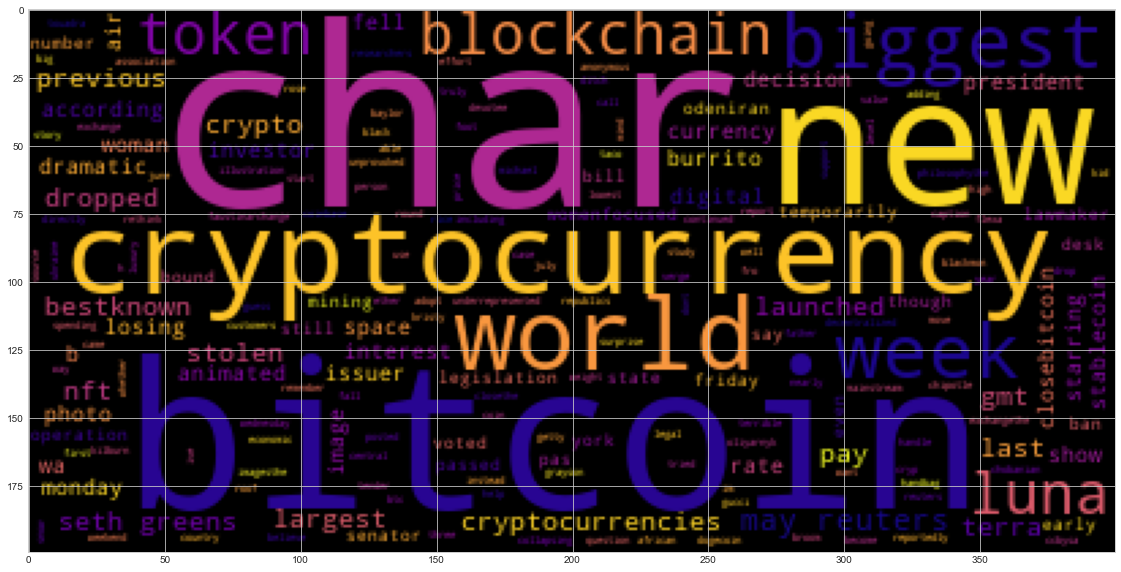

In [28]:
# Generate the Bitcoin word cloud
bitcoin_string = ' '.join(bitcoin_tokens)
wc_bitcoin = WordCloud(colormap='plasma').generate(bitcoin_string)
wc_bitcoin.to_file('Images/bitcoin_cloud.jpeg')
plt.imshow(wc_bitcoin)

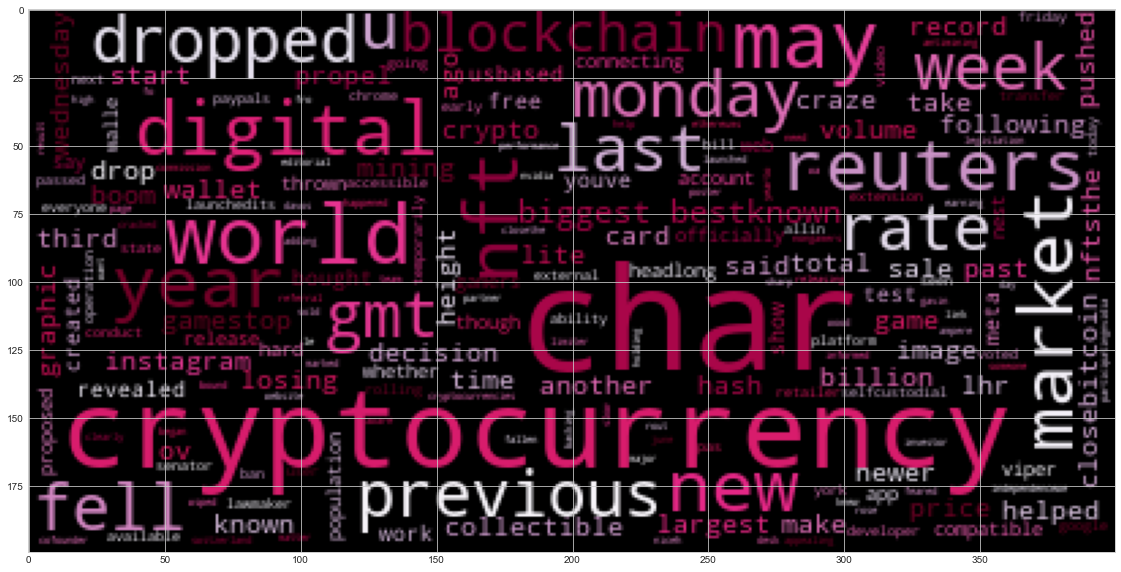

In [29]:
# Generate the Ethereum word cloud
ethereum_string = ' '.join(ethereum_tokens)
wc_ethereum = WordCloud(colormap='PuRd').generate(ethereum_string)
wc_ethereum.to_file('Images/ethereum_cloud.jpeg')
plt.imshow(wc_ethereum)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 6.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [33]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_string)

# Add a title to the document
bitcoin_doc.user_data['title'] = 'BITCOIN NER'

In [ ]:
displacy.render?

In [44]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [35]:
# List all Entities
print([ent.text for ent in bitcoin_doc.ents])

['new york', 'early friday', 'pas', 'first', 'fall weekend', 'grayson', 'michael chobanian', 'gucci handbag', 'week', 'reuters', 'wednesday', 'monday', 'june', 'gmt monday', 'year', 'last july', 'week', 'last week', 'mexican', 'north london week ago', 'winter ninth week', 'two', 'today']


---

### Ethereum NER

In [36]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_string)

# Add a title to the document
ethereum_doc.user_data['title'] = 'ETHEREUM NER'

In [37]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [38]:
# List all Entities
print([ent.text for ent in ethereum_doc.ents])

['today', 'monday', 'new york', 'early friday', 'pas', 'switzerland', 'gavin wood', 'char day ago', 'third', 'week', 'wednesday', 'reuters', 'monday', 'june', 'gmt monday', 'year', 'last july', 'week', 'last week', 'first', 'several year ago', 'kim kardashian', 'nba', 'fall weekend', 'third', 'wednesday']


---